# EDA on Algerian Fire Forest Dataset

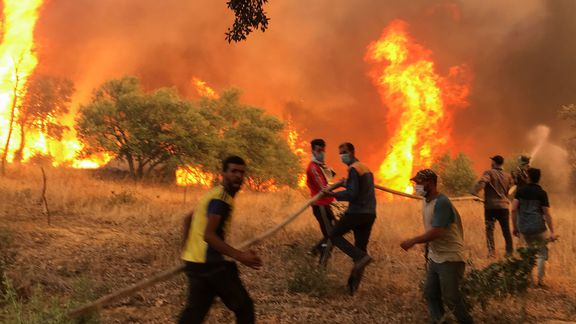

In [48]:
from IPython import display
display.Image("D:\Algeria_forest.jpg", width=1000)

### Life Cycle of Machine Learning Project

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

#### Dataset Link : https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

#### Data Set Information:

- The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

- 122 instances for each region.

- The period from June 2012 to September 2012.

- The dataset includes 11 attribues and 1 output attribue (class)

- The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

#### Attribute Information:

- 1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

- 2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

- 3. RH : Relative Humidity in %: 21 to 90

- 4. Ws :Wind speed in km/h: 6 to 29

- 5. Rain: total day in mm: 0 to 16.8 FWI Components

- 6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

- 7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

- 8. Drought Code (DC) index from the FWI system: 7 to 220.4

- 9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

- 10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

- 11. Fire Weather Index (FWI) Index: 0 to 31.1

- 12. Classes: two classes, namely Fire and not Fire

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline
import plotly.express as px
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
df=pd.read_csv("D:\Algerian_forest_fires_dataset_UPDATE (1).csv", header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.shape

(246, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
# We hav few extra space in column name
for feature in df.columns:
    df.rename(columns= {feature : feature.strip()}, inplace=True )
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [9]:
#Deleting uneccesary rows
df.drop([122,123], axis=0, inplace=True)

In [10]:
# There is till one missing value present in dataset
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [11]:
#Checking which index have NaN value
df[df['Classes'].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### Observation
- At index 167 few column values are shifted towards left

In [12]:
# WE need range that enitities correctly
df.at[167, 'DC']=14.6
df.at[167, 'ISI']=9
df.at[167, 'BUI']=12.5
df.at[167, 'FWI']=10.4
df.at[167, 'Classes']='fire'

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [14]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [15]:
#Adding new column in dataset because we have two region present in dataset
# From index 0-122 we have Bajaija region 
# From index 122 onwards we have Sidi-Bel Abbes region
df.loc[:122, 'Region']='Bajaia'
df.loc[122:, 'Region']='Sidi-Bel Abbes'

#### Observtaion
- We added region columns for better understanding

In [16]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

In [17]:
#here we combined day, month and year column together
df['date']=(df['day']+('/')+df['month']+('/')+df['year'])
df.date

0      01/06/2012
1      02/06/2012
2      03/06/2012
3      04/06/2012
4      05/06/2012
          ...    
241    26/09/2012
242    27/09/2012
243    28/09/2012
244    29/09/2012
245    30/09/2012
Name: date, Length: 244, dtype: object

In [18]:
#Dropping day, month, year column
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [19]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bajaia,01/06/2012
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bajaia,02/06/2012
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bajaia,03/06/2012
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bajaia,04/06/2012
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bajaia,05/06/2012


In [20]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

#### Observation 
- Here we have few uneccesary spaces between classes entities

In [21]:
#striping uneccessary spaces
df['Classes']= [i.strip() for i in df['Classes']]

In [22]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [23]:
# Changing important columns datatypes
df.dtypes

Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
date           object
dtype: object

#### Observation
- Few numeric columns have dtype as object

In [24]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

In [25]:
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['FWI']=df['FWI'].astype(float)
df['Temperature']=df['Temperature'].astype(int)


In [26]:
df.dtypes

Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
date            object
dtype: object

In [27]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bajaia,01/06/2012
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bajaia,02/06/2012
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bajaia,03/06/2012
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bajaia,04/06/2012
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bajaia,05/06/2012


In [28]:
df.shape

(244, 13)

In [29]:
#Checking duplicate values
df.duplicated().sum()

0

In [30]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


#### Observation
- As we can see min, max, 24th, 50th and 75th percentile surely we have some outliers in few features

<AxesSubplot:xlabel='Rain'>

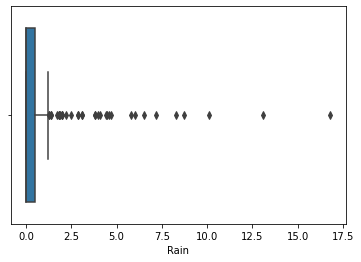

In [31]:
sns.boxplot(x=df['Rain'])

<AxesSubplot:xlabel='DC'>

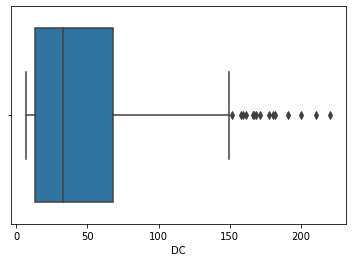

In [32]:
sns.boxplot(x=df['DC'])

## EDA and Feature Engineearning

In [33]:
Num_col=[feature for feature in df.columns if df[feature].dtypes!='O']
Num_col

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

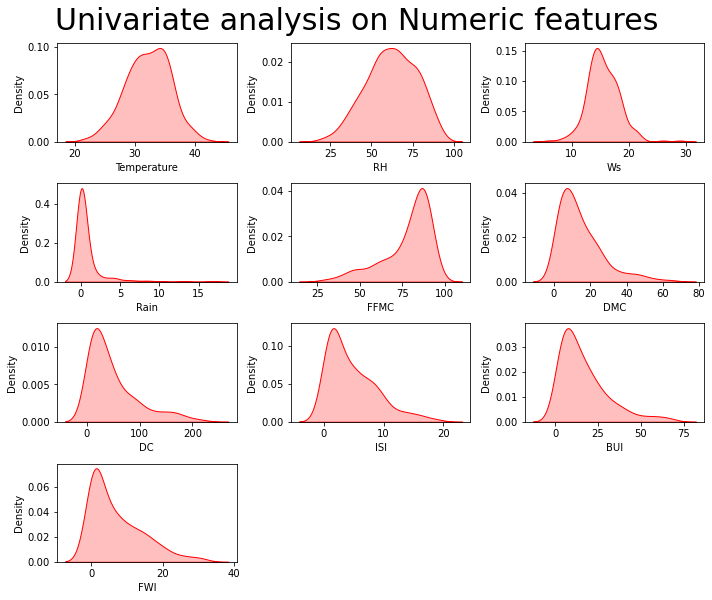

In [34]:
plt.figure(figsize= (10,10))
plt.suptitle('Univariate analysis on Numeric features', fontsize=30)

for i in range(len(Num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[Num_col[i]], shade=True, color='r')
    plt.xlabel(Num_col[i])
    plt.tight_layout()

#### Observation
- Feature Tempreture, RH, WH are normally distrubuted
- Feature Rain, DC, ISI, BUI, FWI are right skewed and have outliers
- Feature FFMC, DMC are left skewed and have outliers

In [35]:
Cat_col=[feature for feature in df.columns if df[feature].dtypes=='O']
Cat_col

['Classes', 'Region', 'date']

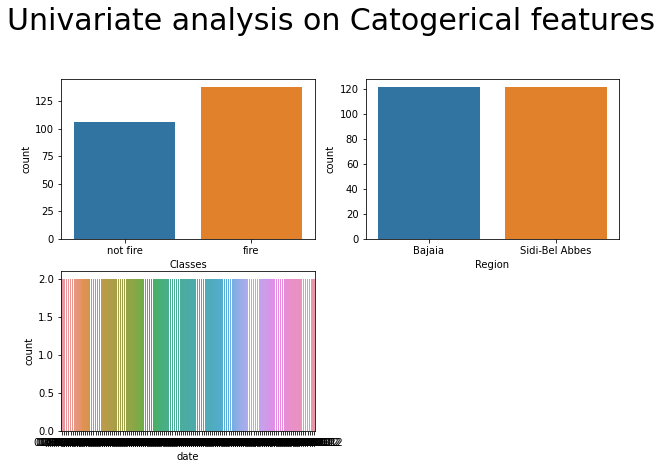

In [36]:
plt.figure(figsize= (10,10))
plt.suptitle('Univariate analysis on Catogerical features', fontsize=30)

for i in range(len(Cat_col)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[Cat_col[i]])
    plt.xlabel(Cat_col[i])
  

#### Observation
- In Classes feature there are more count of fire compared to no fire

In [37]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000


<AxesSubplot:>

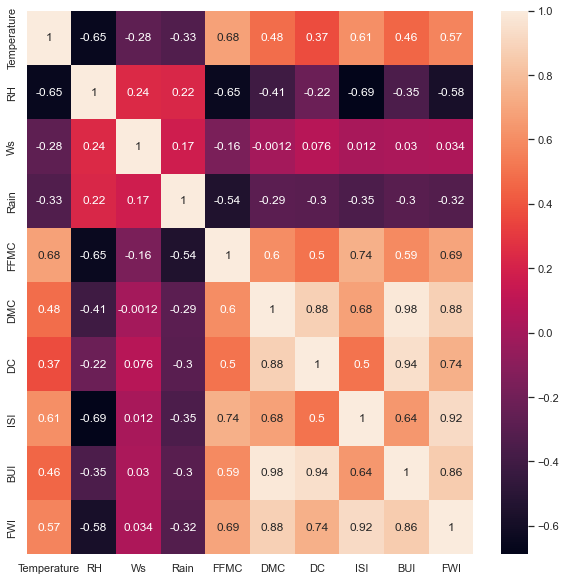

In [38]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(df.corr(), annot=True)

## Bivariate Data Analysis

In [39]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

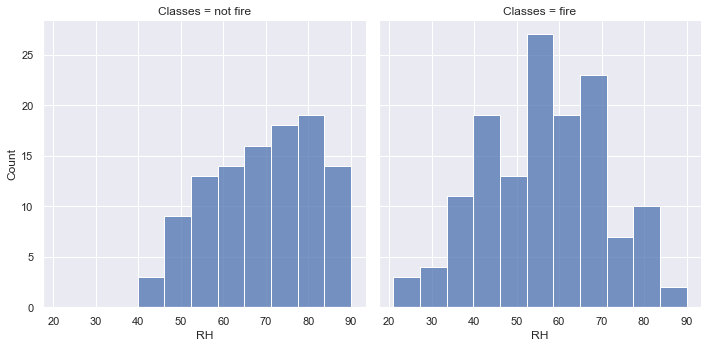

In [40]:
sns.displot(df, x='RH', col="Classes")

#### Observation 
- RH(relative humidity) between range 40% - 70% rate of catching fire is high

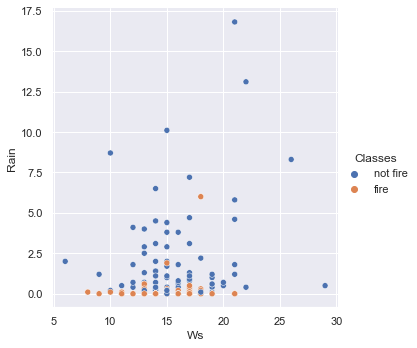

In [41]:
sns.relplot(data=df, x="Ws", y="Rain", hue="Classes")

#### Observation
- Whenever there is less Ws(Wind speed) the chances of rain are less , so chances of catching fire is high (most of fire shown in this phase)

- Whenever there is high Ws(Wind speed) the chances of rain are high , so chances of catching fire is less


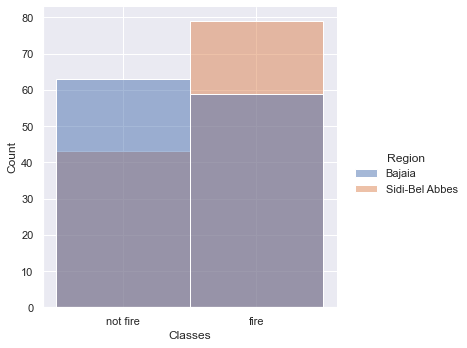

In [42]:
sns.displot(df, x='Classes', hue='Region')

#### Observation
- As compared to Sidi-Bel Abbes region Bajaija region has more fire cases

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

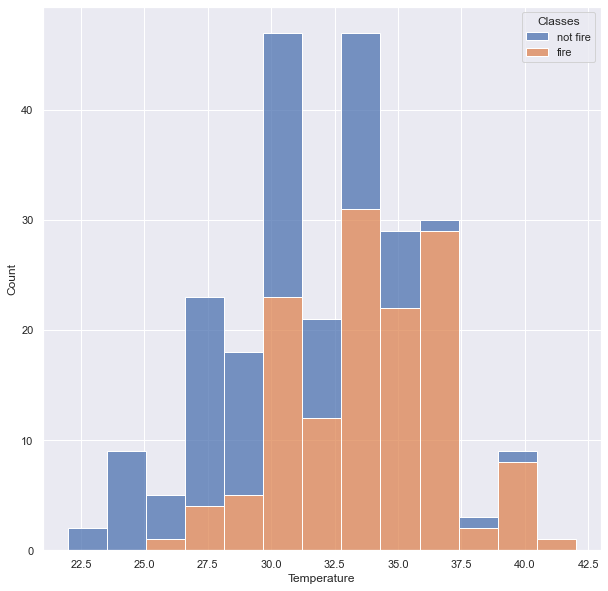

In [43]:
sns.histplot(data=df, x="Temperature", hue="Classes", multiple="stack")

#### Observation
- The relationship between Temperature and Classes are directly propotional

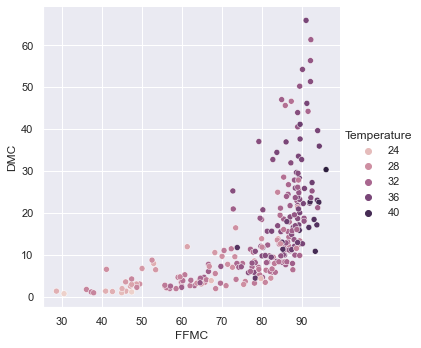

In [44]:
sns.relplot(data=df, x="FFMC", y="DMC", hue="Temperature")

#### Observation
- Feature FFMC(Fine Fuel Moisture Code), DMC(Duff Moisture Code) increses exponentially with respect to Temperature

In [45]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

<AxesSubplot:xlabel='DC', ylabel='DMC'>

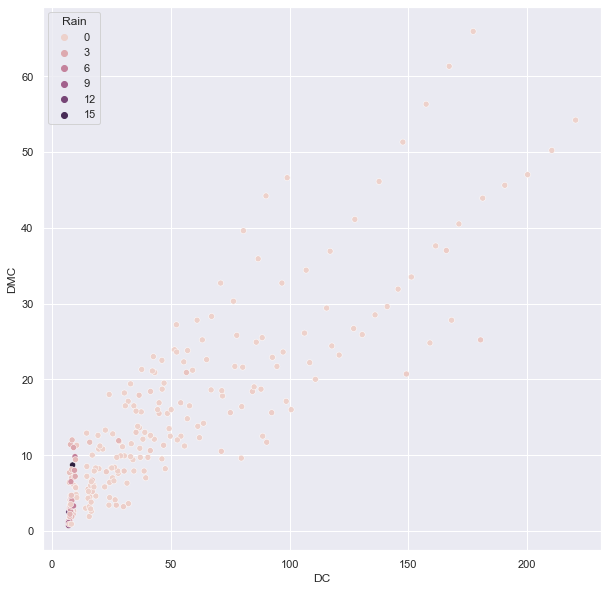

In [46]:
sns.scatterplot(data=df, x='DC',y='DMC', hue='Rain')

#### Observation 
- As we can see when DC(Drought Code) increses along with DMC(Duff Moisture Code ) chances of Rain are very less

<AxesSubplot:xlabel='ISI', ylabel='FFMC'>

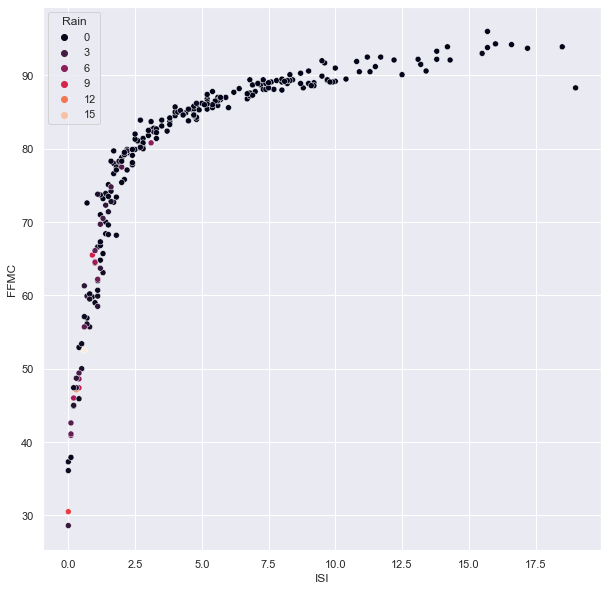

In [47]:
sns.scatterplot(data=df,x='ISI', y='FFMC', hue='Rain', palette='rocket')

### Final Observation
- As compared to Sidi-Bel Abbes region Bajaia region have more fire cacthed cases
- Increase in feature Tempreture , Fine Fuel Moisture Code (FFMC),  Duff Moisture Code (DMC) showns more fire cases
- While feature like Increase in Ws (Wind speed), Rain showns less chances of fire catched


